# Aula 6 Ex 2
## Data Augmentation

Para combater overfitting...

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from inspect import currentframe, getframeinfo
import os
from matplotlib import pyplot as plt
import sys

%matplotlib inline

Using TensorFlow backend.


In [2]:
#main
nl, nc = 32,32

(ax, ay), (qx, qy) = cifar10.load_data()

ax = ax.reshape(ax.shape[0], nl, nc, 3)
qx = qx.reshape(qx.shape[0], nl, nc, 3)

input_shape = (nl, nc, 3)

ax = ax.astype('float32')
qx = qx.astype('float32')
ax /= 255 #0 a 1
qx /= 255 #0 a 1

num_classes=10

ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)

In [3]:
print('Real-time data augmentation.')

datagen1 = ImageDataGenerator() #Nao distorce imagem

datagen2 = ImageDataGenerator( #Distorce imagem
    
# randomly shift images horizontally - Fraction of width
width_shift_range=0.1,
    
# randomly shift images vertically - Fraction of height
height_shift_range=0.1,
    
# Preenche pixels fora do dominio com valores dentro da imagem
fill_mode='nearest',
    
# Espelha imagem horizontalmente
horizontal_flip=True)

Real-time data augmentation.


Compute quantities required for featurewise normalization
<br>
(std, mean, and principal components if ZCA whitening is applied).
<br>
Caso nao use, nao precisa destes comandos.
<br>
datagen1.fit(ax)
<br>
datagen2.fit(ax)

In [4]:
batch_size=10
#Importante usar a mesma semente, para pegar as mesmas imagens
augdata1=datagen1.flow(ax, batch_size=batch_size, seed=7)
augdata2=datagen2.flow(ax, batch_size=batch_size, seed=7)

a1=augdata1.next()
a2=augdata2.next()

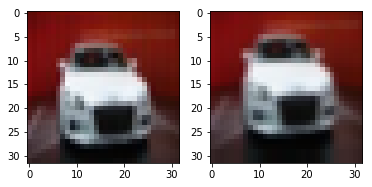

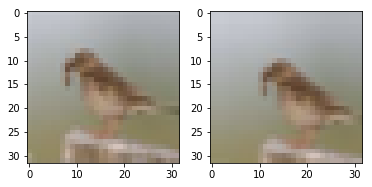

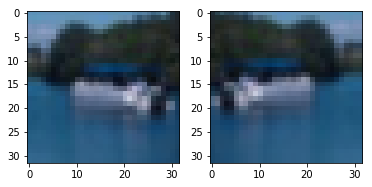

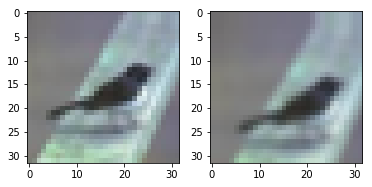

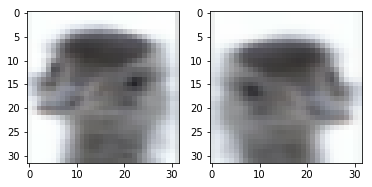

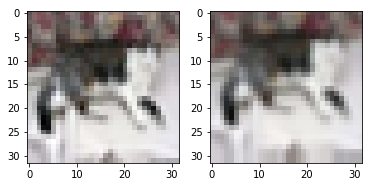

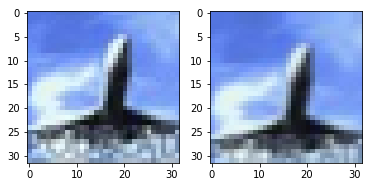

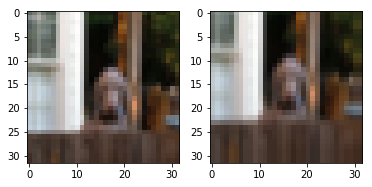

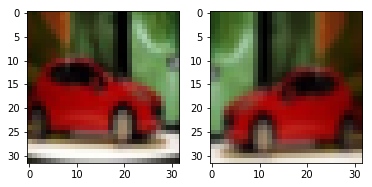

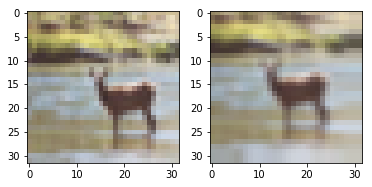

In [5]:
for i in range(batch_size):
    fig, eixo = plt.subplots(1, 2)
    eixo[0].imshow(a1[i])
    eixo[1].imshow(a2[i])
    plt.show()